<a href="https://colab.research.google.com/github/navaidansari786/Hotel-booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!**
# **This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.**
# **Explore and analyze the data to discover important factors that govern the bookings.**

# This project contains the data set of booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the hotel booking is cancel, customers are arrival, children and babies etc. All personally identifying information has from the data and explain the exploratory data analysis with python to get comprehension from the data.

# **Import Packages**
# First Import necessary packages and import the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline
import folium
sns.set(color_codes=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
df_hotel = pd.read_csv('/content/drive/MyDrive/Alma better/Capstone Project/Exploratory Data Analysis/Hotel Bookings.csv')

# **Data Preprocessing**

In [81]:
df_hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [82]:
df_hotel.shape

(119390, 32)

In [83]:
list(df_hotel.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [84]:
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [85]:
df_hotel.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [86]:
df_hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [87]:
df_hotel.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [88]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [89]:
df_hotel.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

In [90]:
# Total number of duplicate rows persent in this data.

duplicate_rows = df_hotel[df_hotel.duplicated()]
print("Number of duplicate rows:",duplicate_rows.shape)

Number of duplicate rows: (31994, 32)


# **Data Preparation and Cleaning**
###> Dealing with the Null values of the data set

In [91]:
# Null values 
df_hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

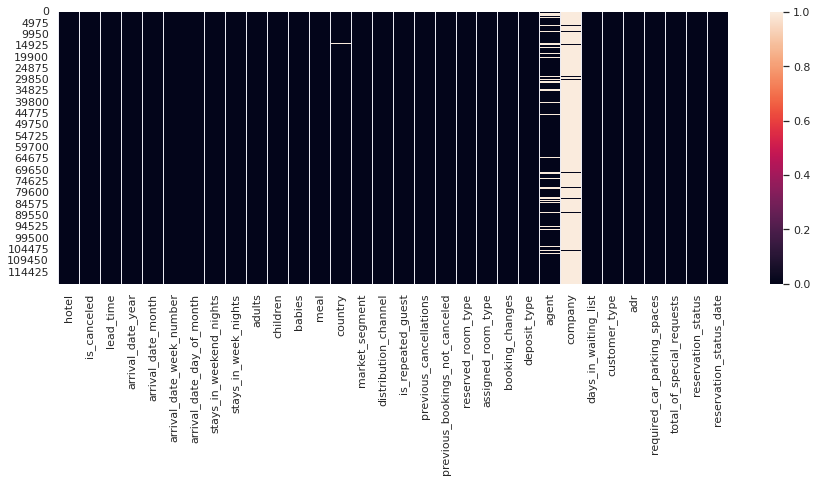

In [92]:
fig,axes = plt.subplots(1,1,figsize=(15,5))
sns.heatmap(df_hotel.isna())
plt.show()

### > As you can see there are 4 column with null values inside. Out of these 4 we can drop the 2 column named "company" and "agent" which are having huge missing values comparatively, so let's drop it. 
###> Then we will replace "children" column null values with column mean.
###> And also replace "country" column null values with mode.

In [93]:
# Drop unnecessary data in dataset.

df_hotel = df_hotel.drop(['agent','company'],axis=1)
df_hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [94]:
# Dealing with null values in column country,children in dataset.

null_values_3 = df_hotel['country'].fillna(df_hotel.country.mode().to_string(), inplace=True)
null_values_4 = df_hotel['children'].fillna(round(df_hotel.children.mean()), inplace=True)


In [95]:
df_hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# **Exploratory Data Analysis**

After dealing with the null values now coming to our problem statement.
Here we will ask some questions from the data set and based on answers we will figure out the factors which governs the hotel booking.

# What type of hotel does a customer book in general?

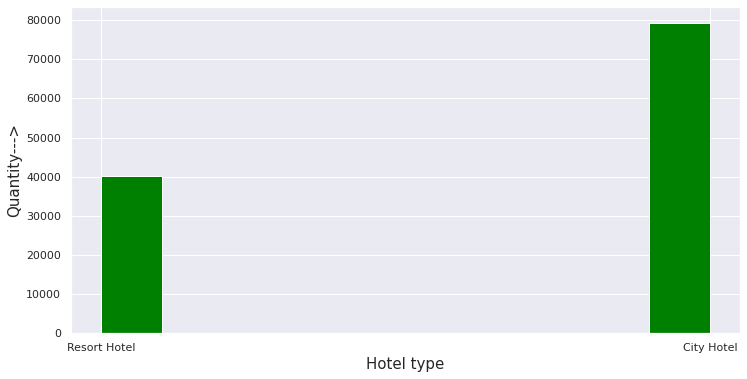

In [96]:
fig, htl=plt.subplots(figsize=(12,6))
htl.hist(df_hotel['hotel'],color='green')
htl.set_xlabel('Hotel type',fontsize=15)
htl.set_ylabel('Quantity--->',fontsize=15)
plt.show()

# Most of the people stay in city hotel.

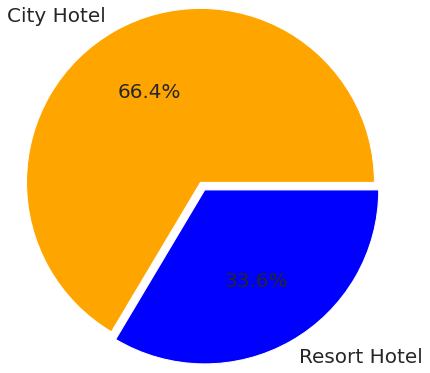

In [97]:
labels = df_hotel['hotel'].value_counts().index.tolist()
sizes = df_hotel['hotel'].value_counts().tolist()
explode = (0, 0.10)
colors = ['orange', 'blue']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =0, textprops={'fontsize': 20},radius=2)
plt.show()

## Shown above the pie chart the most customer stay in City hotel around 67% and Resort hotel around 33%. 

# Which year most of customers arrive?

### By applying uniuqe method on the column arrival_date_year and then value count we will get the number of customers arrival in the different year of data set.

In [99]:
year_plot = df_hotel["arrival_date_year"].unique()
year_plot

array([2015, 2016, 2017])

In [100]:
# Total number of customer are arrival in 2015,2016,2017. 

year=df_hotel['arrival_date_year'].value_counts()
year

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [101]:
# Total number of customer are arrival in months. 

month = df_hotel['arrival_date_month'].value_counts()
month

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

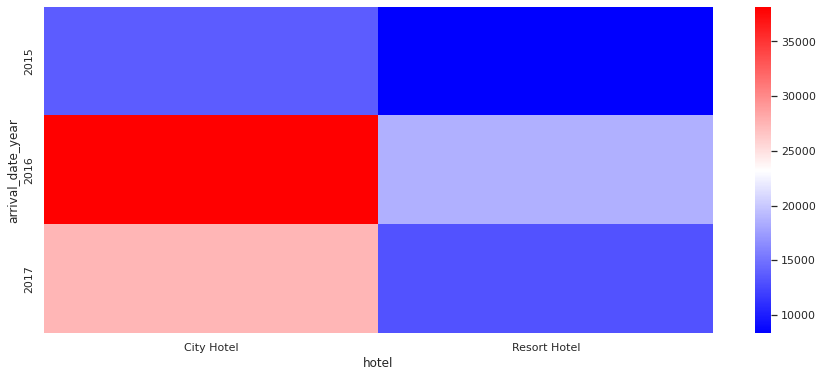

In [102]:
# Which year the maximum number of customer arrives?

sns.set(rc={'figure.figsize':(15,6)})
sns.heatmap(pd.crosstab(df_hotel.arrival_date_year,df_hotel.hotel),cmap='bwr')

## As we seen above the graph the most bookings in 2016.

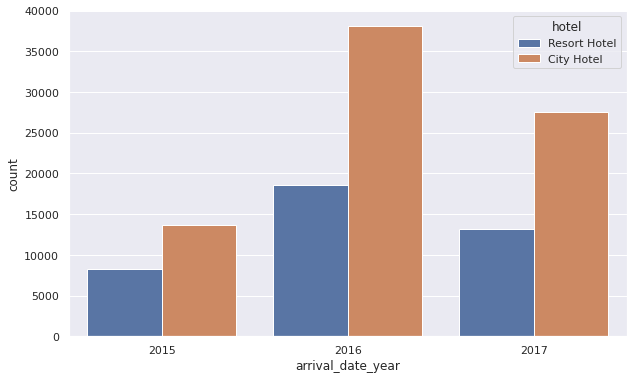

In [103]:
# Year wise comparison.

plt.subplots(figsize=(10,6))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df_hotel);

Text(0.5, 0, 'Arrival Month')

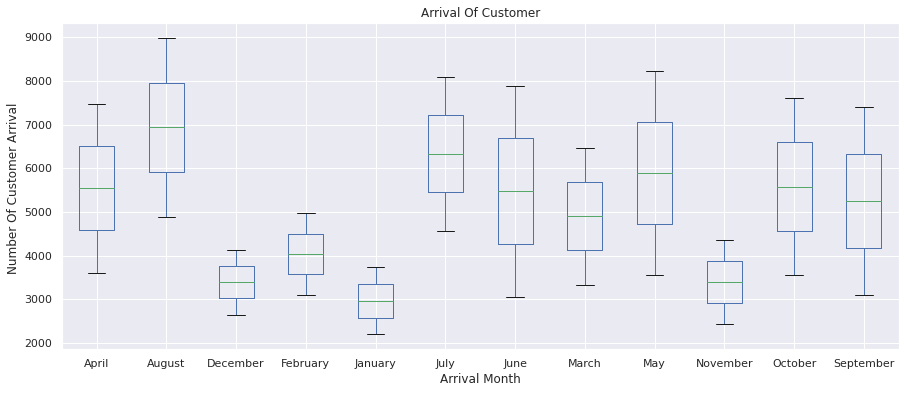

In [104]:
df_hotel.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].size().unstack().plot(kind="box")
plt.title('Arrival Of Customer')
plt.ylabel('Number Of Customer Arrival ')
plt.xlabel('Arrival Month')

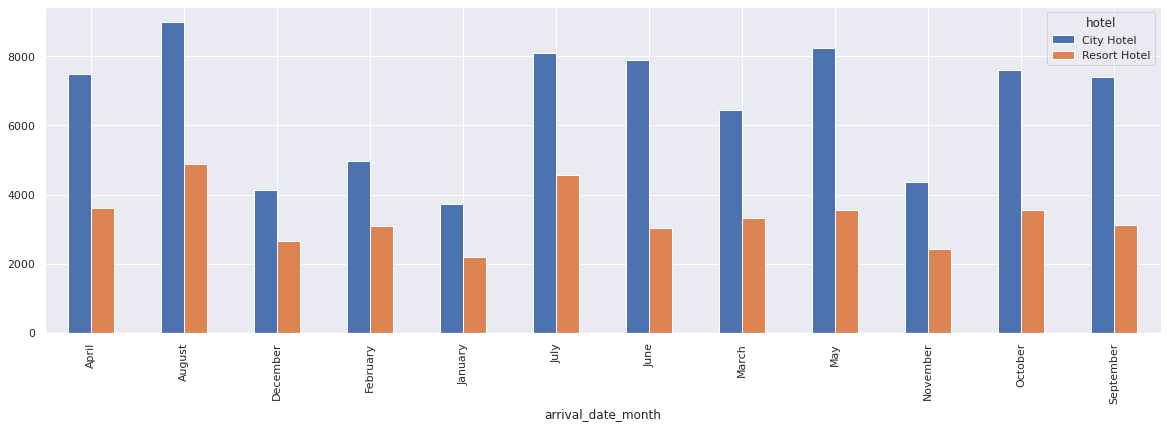

In [105]:
# Which month the number of customer arrival?

aarival_month = df_hotel.groupby(['arrival_date_month','hotel']).size().unstack()
aarival_month.plot(kind='bar',figsize=(20,6))

In [106]:
gorup_month_wating = df_hotel.groupby('arrival_date_month')
wating_list = gorup_month_wating['days_in_waiting_list'].agg(np.sum)

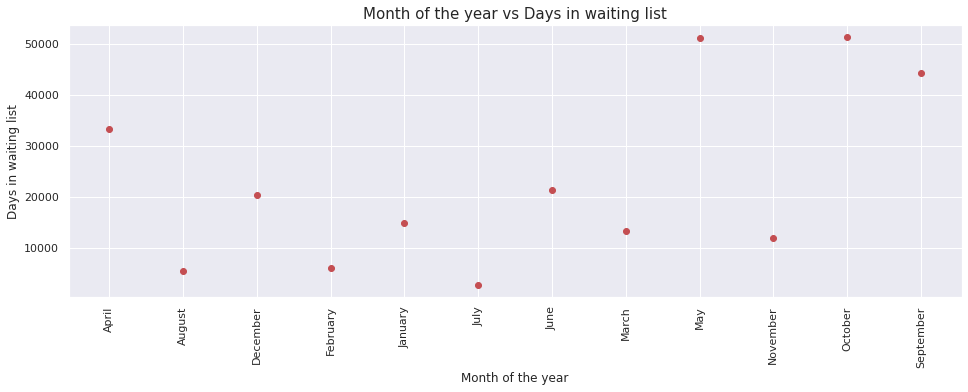

In [107]:
# we discuss about waiting list in hotel booking  
plt.figure(figsize=(16,5))
plt.plot(wating_list,'ro', color='r')
plt.xticks(rotation=90)
plt.title('Month of the year vs Days in waiting list',fontsize=15)
plt.xlabel('Month of the year')
plt.ylabel('Days in waiting list')
plt.show()

# As we see the above graph the most number of waiting list in the month of october, may and september. 

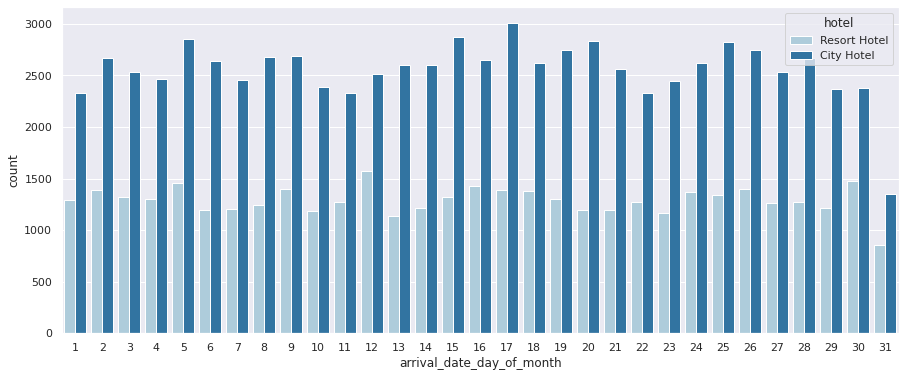

In [108]:
plt.figure(figsize=(15,6))

sns.countplot(data = df_hotel, x = 'arrival_date_day_of_month',hue='hotel',  palette='Paired')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


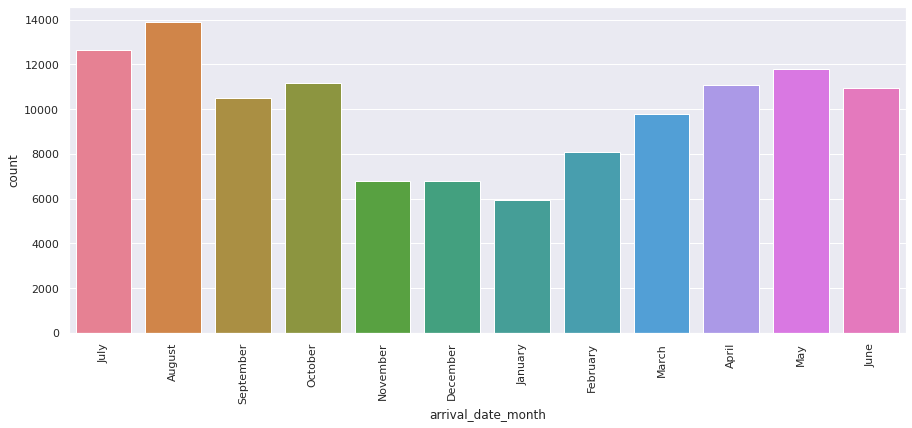

<Figure size 1800x720 with 0 Axes>

In [109]:
month_data = df_hotel['arrival_date_month']
sns.countplot(month_data, palette='husl')
plt.xticks(rotation=90)
plt.figure(figsize=(25,10))
sns.set(rc={'figure.figsize':(12,6)})
plt.show()

# How Many Booking Were Cancelled?

## We will select only those bookings which get canceled.

In [110]:
canceld = df_hotel[df_hotel['is_canceled'] != 0]
canceld

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,107.0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,0,Transient,108.3,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,April,17,25,0,0,0,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,D,K,1,No Deposit,0,Transient,0.0,0,3,Canceled,2017-04-25
111355,City Hotel,1,4,2017,June,23,5,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,4,A,A,0,No Deposit,0,Transient,65.0,0,0,Canceled,2017-06-05
111924,City Hotel,1,7,2017,May,22,31,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,1,A,A,0,No Deposit,0,Transient,65.0,0,0,Canceled,2017-05-31
111925,City Hotel,1,6,2017,July,29,17,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,1,1,A,D,0,No Deposit,0,Transient,65.0,0,0,No-Show,2017-07-17


In [111]:
canceld.shape

(44224, 30)

In [112]:
# Deal with total cancelation ,resort hotel cancelation, city hotel cancelation.

total_cancelation = df_hotel["is_canceled"].sum()
print("Total no. of Cancelation =", total_cancelation)

Resort_cancelation = df_hotel.loc[df_hotel["hotel"] == "Resort Hotel"]["is_canceled"].sum()
print("Resort Hotel Cancelation =",Resort_cancelation)

city_cancelation = df_hotel.loc[df_hotel["hotel"] == "City Hotel"]['is_canceled'].sum()
print("City Hotel cancelation =",city_cancelation)

Total no. of Cancelation = 44224
Resort Hotel Cancelation = 11122
City Hotel cancelation = 33102


In [113]:
# As shown in below with total percentage cancelation,resort hotel and city hotel percentage.

rel_cancel = total_cancelation / df_hotel.shape[0] * 100

rel_Resort_cancelation = Resort_cancelation /  df_hotel.loc[df_hotel["hotel"] == "Resort Hotel"].shape[0] * 100
rel_city_cancelation = city_cancelation / df_hotel.loc[df_hotel["hotel"] == "City Hotel"].shape[0] * 100

print("Total Bookings Canceled =",rel_cancel)
print("Resort Hotel Bookings Canceled =",rel_Resort_cancelation)
print("City Hotel Bookings Canceled =",rel_city_cancelation)


Total Bookings Canceled = 37.041628277075134
Resort Hotel Bookings Canceled = 27.763354967548675
City Hotel Bookings Canceled = 41.72696331778646


# Bookings got canceled 37% of the time. While booking guest did checkd-in (did not cancel the booking ) almost 63% of the time.

In [114]:
# Highest number of cancelation each year.

max_each_year_canceled = df_hotel.groupby("arrival_date_year")["is_canceled"].max().reset_index()
max_each_year_canceled

,arrival_date_year,is_canceled
0,2015,1
1,2016,1
2,2017,1


In [115]:
# Each year highest bookings canceled.

df_hotel.groupby(['hotel', 'arrival_date_year'],as_index=False).agg({'arrival_date_year':"max","is_canceled":"sum"})

,hotel,arrival_date_year,is_canceled
0,City Hotel,2015,6004
1,City Hotel,2016,15407
2,City Hotel,2017,11691
3,Resort Hotel,2015,2138
4,Resort Hotel,2016,4930
5,Resort Hotel,2017,4054


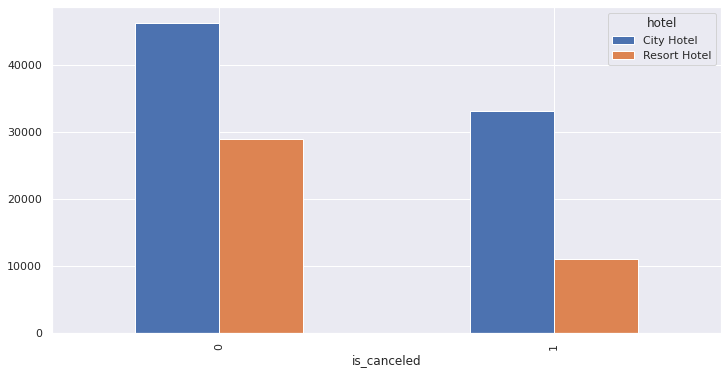

In [116]:
# As shown in the bar chart figure is city and resort cancelation.

df1 =df_hotel.groupby(['is_canceled','hotel']).size().unstack()
df1.plot(kind='bar')

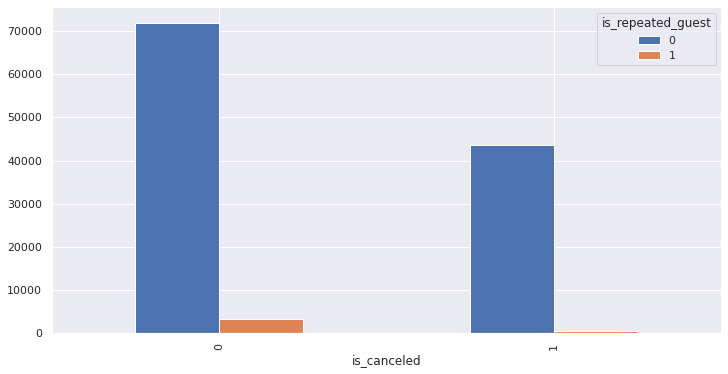

In [117]:
# Those cutomer are canceled and repeate arrival again.

df2 = df_hotel.groupby(['is_canceled','is_repeated_guest']).size().unstack()
df2 = df2.plot(kind='bar')

# Which is the busiest month for hotels?

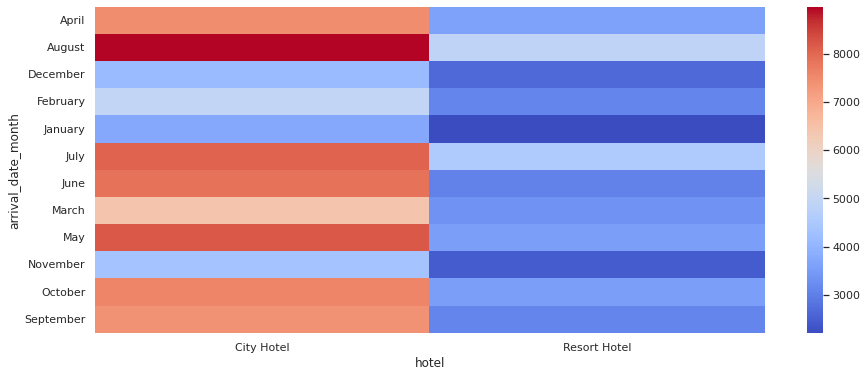

In [118]:
# Which month customer are intersted for booking?

sns.set(rc={'figure.figsize':(15,6)})
sns.heatmap(pd.crosstab(df_hotel.arrival_date_month,df_hotel.hotel),cmap='coolwarm')

## As we can see most bookings were made from July to August. And the least bookings were made at the start and end of the year.

# From which country most guests arrive?

In [120]:
# Counts total number of customer arrive from country.

country = df_hotel['country'].value_counts()
country

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
AIA        1
NAM        1
BDI        1
BFA        1
Name: country, Length: 178, dtype: int64

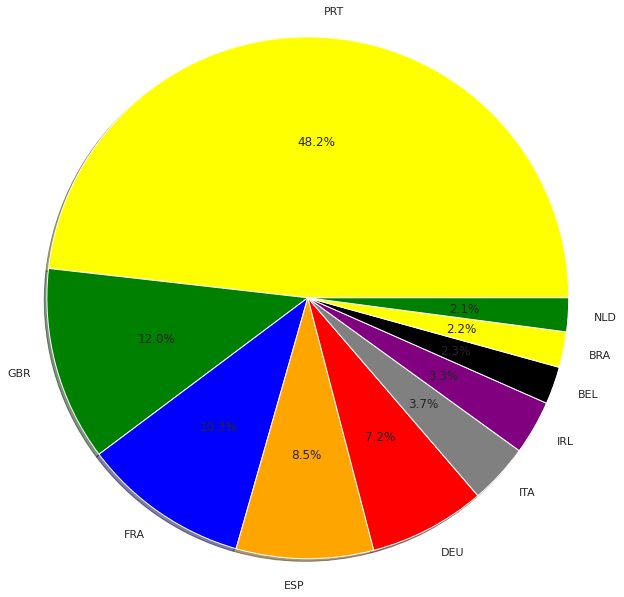

In [121]:
# which country are the most customer visited.

country.head(10).plot.pie(autopct='%1.1f%%',shadow=True,radius=2,colors=['yellow','green','blue','orange','red','grey','purple','black']);

As seen above the most customer were arrive from prt country. it's around 50%.
and most customer arrive from country is prt, gbr, fra, esp, deu etc.

# In this code we are discussing between no deposit, refundable, non refundable payment from customers.

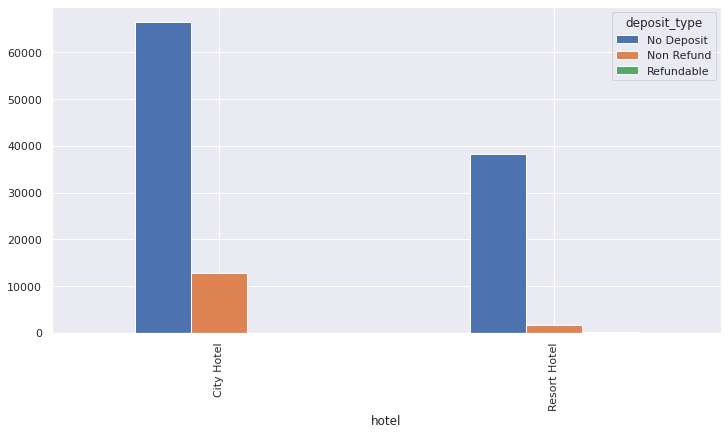

In [122]:
# Show the customer pay the payment of hotel by deposit.
# The graph show that corelation between deposit type.

payment = df_hotel.groupby(['hotel','deposit_type']).size().unstack()

payment = payment.plot(kind='bar',figsize=(12,6))


# We are discuss about market segment.

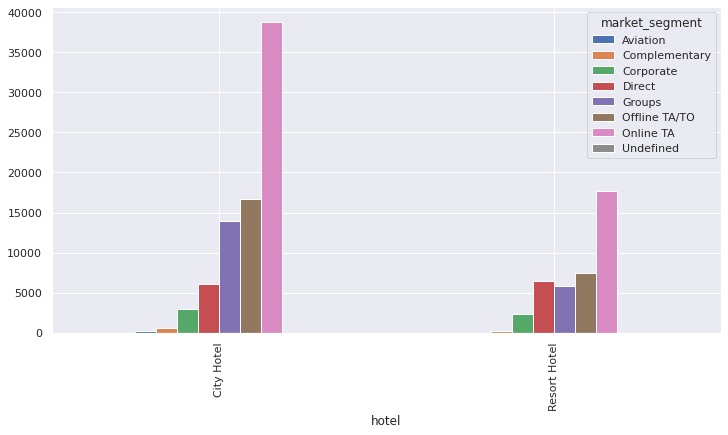

In [123]:
# This function show market segment of city hotel, resort hotel.

market_segment = df_hotel.groupby(['hotel','market_segment']).size().unstack()
market_segment = market_segment.plot(kind='bar',figsize=(12,6))

## Above graph shows that the most of the customers of market segment come from online TA(travel agencies).

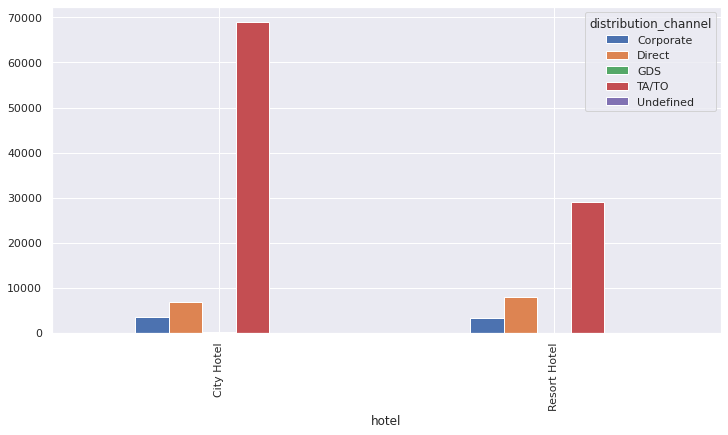

In [124]:
# As we can see below most of the customer want to come from which channel?

distribution_channel = df_hotel.groupby(['hotel','distribution_channel']).size().unstack()
distribution_channel = distribution_channel.plot(kind='bar',figsize=(12,6))

## In this distribution channel most of customer comes from TA/TO in hotel.

In [125]:
# Discuss about total no. of special request.

dfshort = pd.DataFrame(df_hotel,columns=['total_of_special_requests','babies','children','adults'])
corrMatrix= dfshort.corr()
corrMatrix

,total_of_special_requests,babies,children,adults
total_of_special_requests,1.000000,0.097889,0.081736,0.122884
babies,0.097889,1.000000,0.024030,0.018146
children,0.081736,0.024030,1.000000,0.030440
adults,0.122884,0.018146,0.030440,1.000000


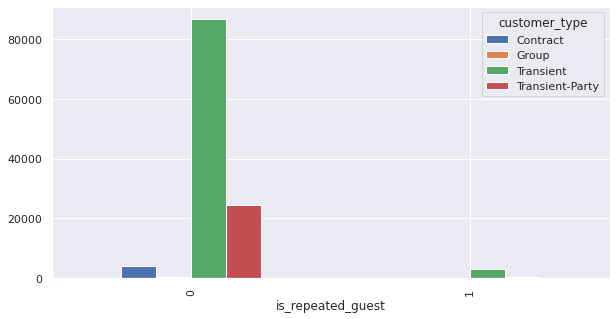

In [126]:
# Which customer are repeated in hotel by contract,transient etc show below.

repeated_customer = df_hotel.groupby(['is_repeated_guest','customer_type']).size().unstack()
repeated_customer = repeated_customer.plot(kind='bar',figsize=(10,5))

## As we can see above graph the most customer are arrive by Transient way.

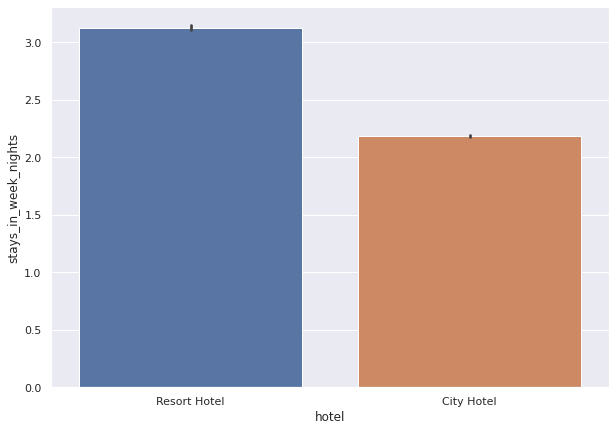

In [127]:
# Those customer stayed in week night.
sns.set(rc={'figure.figsize':(10,7)})
sns.barplot(x="hotel",y="stays_in_week_nights",data=df_hotel)
plt.show()

<function matplotlib.pyplot.show>

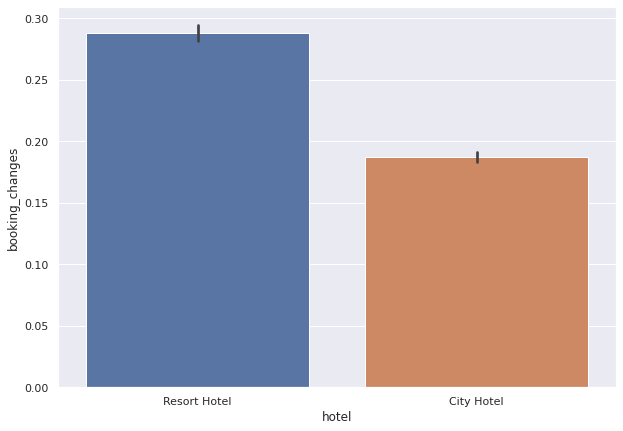

In [128]:
# Meet those customers who changes the booking.

sns.barplot(x="hotel",y="booking_changes",data=df_hotel)
plt.show

# Let’s plot the heatmap and see the correlation

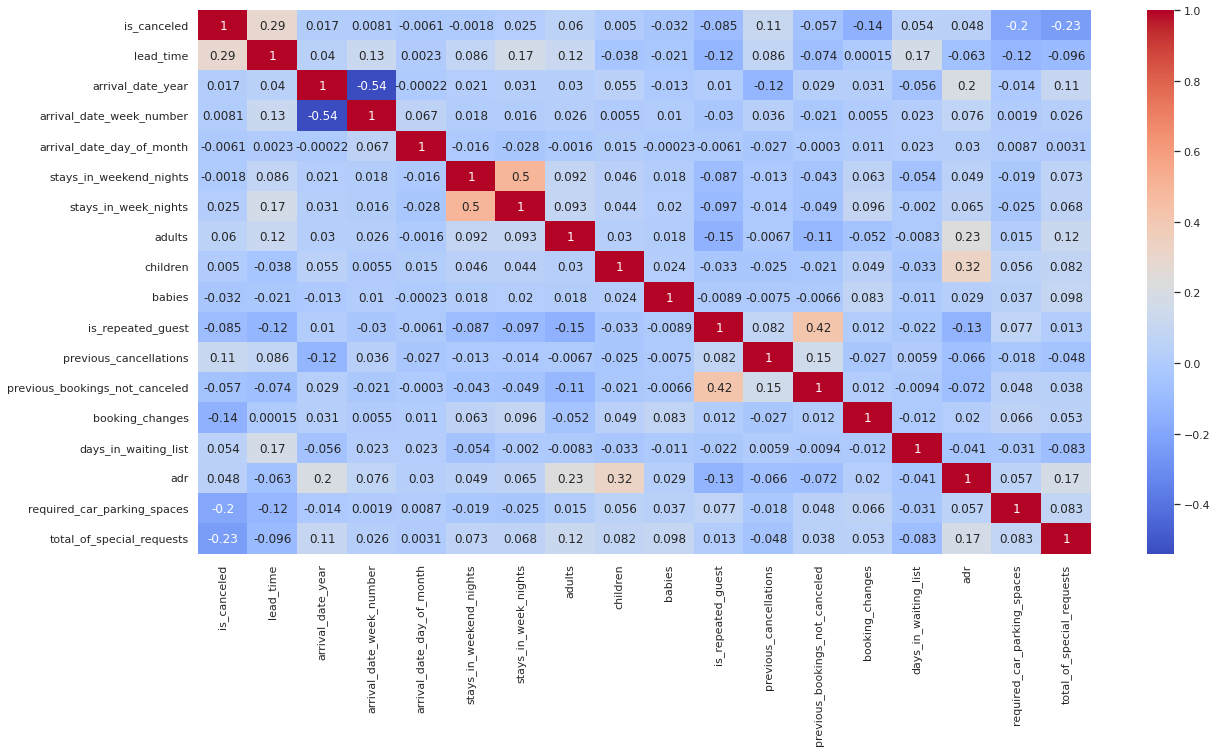

In [129]:
plt.figure(figsize=(20,10))
c=df_hotel.corr()
sns.heatmap(c,cmap="coolwarm",annot=True);


# **Conclusion**


---

That's it! We reached the end of our exercise.
## We learned that :

 * City hotel was booked most by the customer so we should spend most targeting 
fund in these hotel.
 The population booked the City hotel more than 60% .

* We should target the month between July and August as this was peak month due to summer period.And the least bookings were made at the start and end of the year. In the year 2016 bookings more than double ,compared to the previous year.  But the bookings decreased by almost 15% in that year 2017.
  
* Total number of bookings were canceled around 37%.

* Majority of the guests are from Western Europe. We should spend a significant amount of our budget on those area.Portugal(PRT), the UK, and France(FRA), Spain and Germany are the top countries from most guests come, more than 80% come from these 5 countries.

* We also saw that due to no deposit policy, cancelation of booking was more.

* As repeated guest is less, so we should target our advertisement on guests to increase returning guests.

* We then performed feature selection and feature engineering, and then made the predictive model using the Decision Tree to predict whether our customer/guest will cancel the booking or not. And we achieved 99% accuracy.
